<a href="https://colab.research.google.com/github/GHROTH-L/-ai-ml-training-/blob/main/leave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns #畫圖使用
%matplotlib inline

#將dataframe 上傳與下載下來
from google.colab import files


#讀取資料

In [2]:
uploaded = files.upload()
uploaded2 = files.upload()
uploaded3 = files.upload()
uploaded4 = files.upload()

Saving test.csv to test.csv


Saving train.csv to train.csv


Saving submission.csv to submission.csv


Saving season.csv to season.csv


In [3]:
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train = pd.read_csv(io.BytesIO(uploaded2['train.csv']))
sub = pd.read_csv(io.BytesIO(uploaded3['submission.csv'])) #範例
season = pd.read_csv(io.BytesIO(uploaded4['season.csv']))

In [4]:
t_data = train.append(test)

<ipython-input-4-3284ece20f33>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_data = train.append(test)


#觀察資料

In [5]:
season.columns

Index(['yyyy', 'periodQ', 'PerNo', '加班數', '出差數A', '出差數B', '請假數A', '請假數B'], dtype='object')

In [7]:
#輸出所有的變數
for i in t_data.columns:
    print(i)
    print(list(t_data[i].unique()))
    print("================================================")

yyyy
[2014, 2015, 2016, 2017, 2018]
PerNo
[1, 3, 6, 7, 10, 11, 14, 15, 16, 18, 19, 22, 23, 24, 26, 27, 28, 31, 35, 39, 40, 42, 44, 45, 51, 54, 55, 56, 57, 58, 59, 61, 62, 65, 68, 69, 70, 71, 72, 73, 78, 80, 85, 87, 89, 96, 98, 100, 102, 105, 107, 111, 112, 116, 118, 120, 121, 123, 125, 126, 133, 135, 138, 140, 142, 143, 144, 145, 146, 150, 152, 153, 155, 156, 157, 158, 159, 160, 162, 163, 165, 167, 169, 170, 171, 173, 176, 177, 178, 180, 183, 186, 190, 194, 195, 197, 199, 203, 204, 206, 209, 210, 212, 214, 215, 220, 227, 228, 229, 230, 232, 233, 234, 235, 241, 244, 245, 249, 252, 259, 260, 262, 266, 269, 271, 272, 273, 274, 275, 276, 279, 281, 282, 283, 284, 285, 287, 289, 290, 291, 292, 294, 296, 297, 301, 302, 303, 305, 306, 308, 309, 311, 312, 313, 314, 318, 321, 322, 325, 327, 332, 333, 338, 339, 343, 344, 345, 346, 349, 350, 351, 352, 353, 354, 355, 358, 359, 361, 364, 365, 366, 368, 369, 370, 371, 372, 373, 375, 376, 377, 378, 379, 380, 382, 384, 385, 386, 389, 390, 392, 394, 398

In [8]:
#test 與 train的NA
print(test.isnull().sum())
print("================================================")
print(train.isnull().sum())

yyyy            0
PerNo           0
PerStatus    3739
sex            18
工作分類           18
職等             18
廠區代碼           18
管理層級           18
工作資歷1          18
工作資歷2          18
工作資歷3          18
工作資歷4          18
工作資歷5          18
專案時數           18
專案總數           18
當前專案角色         18
特殊專案佔比         18
工作地點           18
訓練時數A          18
訓練時數B          18
訓練時數C          18
生產總額           18
榮譽數            18
是否升遷           18
升遷速度           18
近三月請假數A        18
近一年請假數A        18
近三月請假數B        18
近一年請假數B        18
出差數A           18
出差數B           18
出差集中度          18
年度績效等級A        18
年度績效等級B        18
年度績效等級C        18
年齡層級           18
婚姻狀況           18
年資層級A          18
年資層級B          18
年資層級C          18
任職前工作平均年數      18
最高學歷         1384
畢業學校類別       1067
畢業科系類別         18
眷屬量            18
通勤成本           18
歸屬部門           18
dtype: int64
yyyy            0
PerNo           0
PerStatus       0
sex            73
工作分類           73
職等             73
廠區代碼           73
管理層級           

#資料清洗


In [9]:
#先看一下NA
t_data.isnull().sum()

yyyy            0
PerNo           0
PerStatus    3739
sex            91
工作分類           91
職等             91
廠區代碼           91
管理層級           91
工作資歷1          91
工作資歷2          91
工作資歷3          91
工作資歷4          91
工作資歷5          91
專案時數           91
專案總數           91
當前專案角色         91
特殊專案佔比         91
工作地點           91
訓練時數A          91
訓練時數B          91
訓練時數C          91
生產總額           91
榮譽數            91
是否升遷           91
升遷速度           91
近三月請假數A        91
近一年請假數A        91
近三月請假數B        91
近一年請假數B        91
出差數A           91
出差數B           91
出差集中度          91
年度績效等級A        91
年度績效等級B        91
年度績效等級C        91
年齡層級           91
婚姻狀況           91
年資層級A          91
年資層級B          91
年資層級C          91
任職前工作平均年數      91
最高學歷         6710
畢業學校類別       4908
畢業科系類別         91
眷屬量            91
通勤成本           91
歸屬部門           91
dtype: int64

In [10]:
t_data = train.append(test)

<ipython-input-10-3284ece20f33>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_data = train.append(test)


In [11]:
#最高學歷與畢業類別的數量最多NA所以刪除
t_data = t_data.drop(columns=['最高學歷','畢業學校類別','出差數A','出差數B'])
#類別變項的NA 所以可能還是有用，就將其主換成99留下
dv = ['工作分類','職等','廠區代碼','管理層級','當前專案角色','工作地點','年度績效等級A','年度績效等級B',
      '年度績效等級C','年齡層級','年資層級A','年資層級B','年資層級C','歸屬部門','畢業科系類別'] #na=0
dv2 = ['sex', '是否升遷','工作資歷1','工作資歷2','工作資歷3','工作資歷4','工作資歷5']# na= 3
dv3 = ['婚姻狀況']#na=4
for i in dv:
        t_data[i] = t_data[i].fillna(0)
for i in dv2:
        t_data[i] = t_data[i].fillna(3)
for i in dv3:
        t_data[i] = t_data[i].fillna(4)

#連續變項則補上中位數
cv = ['專案時數','專案總數','特殊專案佔比','訓練時數A','訓練時數B','訓練時數C'
      ,'生產總額','榮譽數','升遷速度','出差集中度','任職前工作平均年數','眷屬量'
      ,'通勤成本','近三月請假數A','近一年請假數A','近三月請假數B','近一年請假數B']
for i in cv:
        t_data[i] = t_data[i].fillna(t_data[i].median())



In [12]:
t_data.isnull().sum()

yyyy            0
PerNo           0
PerStatus    3739
sex             0
工作分類            0
職等              0
廠區代碼            0
管理層級            0
工作資歷1           0
工作資歷2           0
工作資歷3           0
工作資歷4           0
工作資歷5           0
專案時數            0
專案總數            0
當前專案角色          0
特殊專案佔比          0
工作地點            0
訓練時數A           0
訓練時數B           0
訓練時數C           0
生產總額            0
榮譽數             0
是否升遷            0
升遷速度            0
近三月請假數A         0
近一年請假數A         0
近三月請假數B         0
近一年請假數B         0
出差集中度           0
年度績效等級A         0
年度績效等級B         0
年度績效等級C         0
年齡層級            0
婚姻狀況            0
年資層級A           0
年資層級B           0
年資層級C           0
任職前工作平均年數       0
畢業科系類別          0
眷屬量             0
通勤成本            0
歸屬部門            0
dtype: int64

#不平衡的資料

In [13]:
#挑選出train資料
t_data_train = t_data[t_data['PerStatus'].notnull()]

<AxesSubplot:xlabel='PerStatus', ylabel='count'>

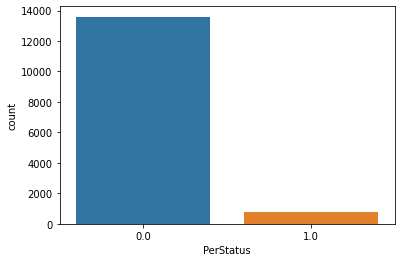

In [14]:
sns.countplot(x=t_data_train['PerStatus'], data=train)

In [15]:
len(t_data_train[t_data_train['PerStatus']==1]) # 離職人數為796

796

In [16]:
t_data_train = t_data_train.sample(frac=1)#打亂順序
t_data_train_quit = t_data_train.loc[t_data_train['PerStatus'] == 1] #選出離職人數
t_data_train_non_quit = t_data_train.loc[t_data_train['PerStatus'] == 0][:796] #隨機選出位離職的796人
t_data_train_new = t_data_train_quit.append(t_data_train_non_quit) #重新合併薪資料
t_data_train_new_shuffle = t_data_train_new.sample(frac=1, random_state=69)

<ipython-input-16-a389e637f4b3>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_data_train_new = t_data_train_quit.append(t_data_train_non_quit) #重新合併薪資料


In [17]:
t_data_train_new_shuffle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1592 entries, 6686 to 2776
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yyyy       1592 non-null   int64  
 1   PerNo      1592 non-null   int64  
 2   PerStatus  1592 non-null   float64
 3   sex        1592 non-null   float64
 4   工作分類       1592 non-null   float64
 5   職等         1592 non-null   float64
 6   廠區代碼       1592 non-null   float64
 7   管理層級       1592 non-null   float64
 8   工作資歷1      1592 non-null   float64
 9   工作資歷2      1592 non-null   float64
 10  工作資歷3      1592 non-null   float64
 11  工作資歷4      1592 non-null   float64
 12  工作資歷5      1592 non-null   float64
 13  專案時數       1592 non-null   float64
 14  專案總數       1592 non-null   float64
 15  當前專案角色     1592 non-null   float64
 16  特殊專案佔比     1592 non-null   float64
 17  工作地點       1592 non-null   float64
 18  訓練時數A      1592 non-null   float64
 19  訓練時數B      1592 non-null   float64
 20  訓練時數C

#特徵篩選1 選擇前10名
效果不是很理想，反而都不要篩選，正確率更高(22%)
所以開始特徵篩選2

In [19]:
#類別變項
dv_all = ['工作分類','職等','廠區代碼','管理層級','當前專案角色','工作地點','年度績效等級A','年度績效等級B',
      '年度績效等級C','年齡層級','年資層級A','年資層級B','年資層級C','歸屬部門','畢業科系類別','sex', 
      '是否升遷','工作資歷1','工作資歷2','工作資歷3','工作資歷4','工作資歷5','婚姻狀況']
#連續變項 = 就是cv

In [101]:
#卡方檢定
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#選擇特徵
x_new_best = SelectKBest(chi2,k=5)#取前10名
x_new_best.fit(t_data_train_new_shuffle[dv_all],t_data_train_new_shuffle['PerStatus'])
#選擇欄位名稱
x_new_col = t_data_train_new_shuffle[dv_all].columns[x_new_best.get_support()]
x_new_col

Index(['年齡層級', '年資層級A', '年資層級B', '歸屬部門', '工作資歷5'], dtype='object')

In [78]:
#anova分析
from sklearn.feature_selection import f_classif
#選擇特徵
x_new2_best = SelectKBest(f_classif, k =5)#各取前十名
x_new2_best.fit(t_data_train_new_shuffle[cv],t_data_train_new_shuffle['PerStatus'])
#取得欄位名稱
x_new2_col = t_data_train_new_shuffle[cv].columns[x_new2_best.get_support()]
x_new2_col

Index(['升遷速度', '任職前工作平均年數', '眷屬量', '近三月請假數B', '近一年請假數B'], dtype='object')

In [79]:
x_new=np.concatenate((x_new_col, x_new2_col), axis=0)
print(len(x_new))
x_new

10


array(['年齡層級', '年資層級A', '年資層級B', '歸屬部門', '工作資歷5', '升遷速度', '任職前工作平均年數',
       '眷屬量', '近三月請假數B', '近一年請假數B'], dtype=object)

#特徵篩選2

In [133]:
#卡方檢定
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# 計算卡方值和 P-value
x_new_scores, x_new_pvals = chi2(t_data_train_new_shuffle[dv_all], t_data_train_new_shuffle['PerStatus'])

# 將卡方值和 P-value 串接成 DataFrame
df_scores_pvals = pd.DataFrame({'Feature': dv_all, 'Score': x_new_scores, 'P-value': x_new_pvals})

# 根據 P-value 選擇顯著的特徵
significant_features = df_scores_pvals[df_scores_pvals['P-value'] < 0.001]['Feature'].tolist()

# 選擇顯著的特徵
x_new_best2 = SelectKBest(chi2, k=len(significant_features))
x_new_best2.fit(t_data_train_new_shuffle[dv_all], t_data_train_new_shuffle['PerStatus'])

#選取出欄位
x_new_col2 = t_data_train_new_shuffle[dv_all].columns[x_new_best2.get_support()]
x_new_col2

Index(['年齡層級', '年資層級A', '年資層級B', '年資層級C', '歸屬部門', '工作資歷5'], dtype='object')

In [134]:
#anova分析
from sklearn.feature_selection import f_classif

# 計算P-value
x_new2_scores, x_new2_pvals = f_classif(t_data_train_new_shuffle[cv], t_data_train_new_shuffle['PerStatus'])

# 將卡方值和 P-value 串接成 DataFrame
df_scores_pvals2 = pd.DataFrame({'Feature': cv, 'Score': x_new2_scores, 'P-value': x_new2_pvals})

# 根據 P-value 選擇顯著的特徵
significant_features2 = df_scores_pvals2[df_scores_pvals2['P-value'] < 0.001]['Feature'].tolist()

# 選擇顯著的特徵
x_new2_best2 = SelectKBest(f_classif, k=len(significant_features2))
x_new2_best2.fit(t_data_train_new_shuffle[cv], t_data_train_new_shuffle['PerStatus'])

#選取出欄位
x_new2_col2 = t_data_train_new_shuffle[cv].columns[x_new2_best2.get_support()]
x_new2_col2

Index(['特殊專案佔比', '升遷速度', '任職前工作平均年數', '眷屬量', '近三月請假數B', '近一年請假數B'], dtype='object')

In [135]:
x_new2=np.concatenate((x_new_col2, x_new2_col2), axis=0)
print(len(x_new2))
x_new2

12


array(['年齡層級', '年資層級A', '年資層級B', '年資層級C', '歸屬部門', '工作資歷5', '特殊專案佔比',
       '升遷速度', '任職前工作平均年數', '眷屬量', '近三月請假數B', '近一年請假數B'], dtype=object)

#SVM

In [138]:
#分開資料
train_x = t_data_train_new_shuffle[t_data_train_new_shuffle['PerStatus'].notnull()][x_new2].values
train_y = t_data_train_new_shuffle[t_data_train_new_shuffle['PerStatus'].notnull()][['PerStatus']].values
test_x = t_data[t_data['PerStatus'].isnull()].drop('PerStatus',axis=1)[x_new2].values

In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=69)

In [64]:
from sklearn import svm
svm = svm.LinearSVC( random_state= 69)
#svm.LinearSVC()是svm的classifier
#svm.LinearSVR()是svm的regression
#這裡是要二分，所以使用svc

In [65]:
svm.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=69)

In [67]:
svm_pred_y_test = svm.predict(x_test)
svm_pred_y_test = svm_pred_y_test.reshape(478 ,-1) #他有478列

In [70]:
svm.score(x_test,y_test)

0.5251046025104602

In [ ]:
#將預測繳交
svm_pred = svm.predict(test_x)
svm_sub = pd.DataFrame({"PerNo":sub['PerNo'],
                "PerStatus":svm_pred.astype(int)})
svm_sub.to_csv('svm_sub.csv', encoding = 'utf-8-sig', index = False) 
files.download('svm_sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#隨機森林

In [140]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=2, n_estimators=250, min_samples_split =20,oob_score=True)
forest.fit(train_x,train_y)
print('Base oob score:{}'.format(forest.oob_score_))

<ipython-input-140-f1f8e87a1903>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_x,train_y)


Base oob score:0.6130653266331658


In [141]:
forest.score(x_test,y_test)

0.8138075313807531

In [142]:
#將預測繳交
for_pred = forest.predict(test_x)
for_sub = pd.DataFrame({"PerNo":sub['PerNo'],
                "PerStatus":for_pred.astype(int)})
for_sub.to_csv('for_sub.csv', encoding = 'utf-8-sig', index = False) 
files.download('for_sub.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>